In [1]:
from tensorflow.keras.datasets import mnist
data = mnist.load_data()

In [2]:
(X_train, y_train), (X_test, y_test) = data

In [3]:
X_train[0].shape

(28, 28)

The following step will convert the images which are by default a 2d array with each image being 28*28 pixels 
into a 1d array where each image is an array of 784 (28 x 28) elements
- this makes it easier for neural network to understand the data
- there are a total of 60000 images in the mnist dataset

In [4]:
X_train = X_train.reshape(-1, 28*28).astype("float32")

In [5]:
X_test = X_test.reshape(-1, 28*28).astype("float32")

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test.shape

(10000, 784)

In [9]:
print("X_train shape:", X_train.shape)  # Should print (60000, 784)
print("X_test shape:", X_test.shape)      # Should print (10000, 784)
print("y_train shape:", y_train.shape)    # Should print (60000,)
print("y_test shape:", y_test.shape)      # Should print (10000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


Now for better data processing we need to convert each of these values to a number between 0 and 1
- each element in the 1d array will be a value between 0 and 255 (RGB Scheme)
- convert it by dividing it by 255

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(32,input_dim=28*28, activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [14]:
import tensorflow as tf

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split
X_cv, X_test_split, y_cv, y_test_split = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.0661 - accuracy: 0.9796
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0601 - accuracy: 0.9817
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0559 - accuracy: 0.9828
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0526 - accuracy: 0.9838
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0489 - accuracy: 0.9852
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0415 - accuracy: 0.9876
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0338 - accuracy: 0.9897

In [46]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# getting loss and accuracy of cross validation data
loss, accuracy = model.evaluate(X_cv, y_cv)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy*100.:1f}%")


157/157 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9718
Test Loss: 0.0955612063407898
Test Accuracy: 97.180003%


In [34]:
y_pred = model.predict(X_cv)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class prediction

157/157 [==============================] - 0s 2ms/step


In [53]:
# getting accuracy_score, precision_score, classification_report of cross validation set
accuracy = accuracy_score(y_pred_classes, y_cv)
precision = precision_score(y_pred_classes, y_cv, average="macro")
report = classification_report(y_cv, y_pred_classes)
print("Classification Report:")
print(report)
print()
print(f"Accuracy score: {accuracy*100}%")
print(f"Precision score: {precision*100.:2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       486
           1       0.11      0.11      0.11       574
           2       0.10      0.10      0.10       508
           3       0.10      0.11      0.11       487
           4       0.10      0.10      0.10       481
           5       0.11      0.10      0.10       477
           6       0.09      0.09      0.09       464
           7       0.11      0.11      0.11       532
           8       0.07      0.07      0.07       494
           9       0.10      0.10      0.10       497

    accuracy                           0.10      5000
   macro avg       0.10      0.10      0.10      5000
weighted avg       0.10      0.10      0.10      5000


Accuracy score: 9.98%
Precision score: 9.957817%


In [54]:
cm = confusion_matrix(y_cv, y_pred_classes)

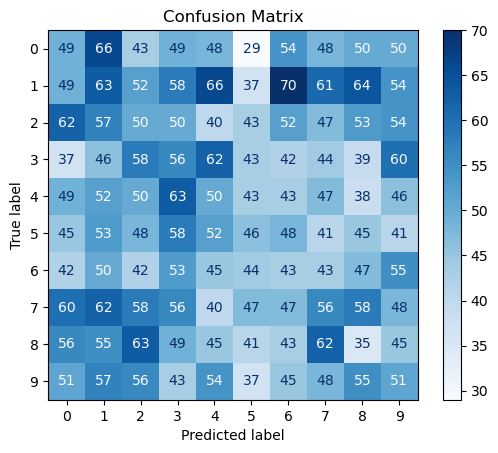

In [55]:
# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_cv))

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [56]:
y_pred_test = model.predict(X_test_split)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)  # Get class prediction

157/157 [==============================] - 0s 3ms/step


In [57]:
accuracy = accuracy_score(y_pred_classes_test, y_test_split)
precision = precision_score(y_pred_classes_test, y_test_split, average="macro")
report = classification_report(y_test_split, y_pred_classes_test)
print("Classification Report:")
print(report)
print()
print(f"Accuracy score: {accuracy*100}%")
print(f"Precision score: {precision*100.:2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       494
           1       0.99      0.99      0.99       561
           2       0.97      0.97      0.97       524
           3       0.96      0.98      0.97       523
           4       0.97      0.97      0.97       501
           5       0.97      0.96      0.97       415
           6       0.98      0.97      0.98       494
           7       0.97      0.98      0.97       496
           8       0.96      0.97      0.96       480
           9       0.97      0.96      0.96       512

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


Accuracy score: 97.28%
Precision score: 97.245019%


In [63]:
# Choose random samples from the test set
num_samples = 5
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
unseen_data = X_test[random_indices]
unseen_labels = y_test[random_indices]  # Use original integer labels


In [64]:
# Make predictions on the unseen data
predictions = model.predict(unseen_data)
predicted_classes = np.argmax(predictions, axis=1)

print("Predictions for unseen data:", predicted_classes)
print("Actual labels for unseen data:", unseen_labels)


1/1 [==============================] - 0s 16ms/step
Predictions for unseen data: [0 3 3 0 9]
Actual labels for unseen data: [0 3 3 0 4]


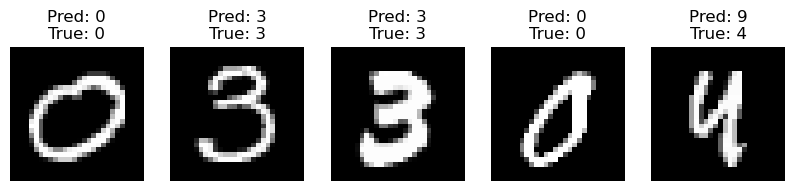

In [65]:
# Plot the results
plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(unseen_data[i].reshape(28, 28), cmap='gray')  # Reshape to (28, 28)
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {unseen_labels[i]}")
    plt.axis('off')
plt.show()
